In [7]:
using Gillespie
using Plots
using LinearAlgebra

In [8]:
# Model parameters.
# ωA = 1.
ωA = 0 # Turning off A
ωB = 1.
ΩA = 0.
ΩB = 1.
γ = 0.1
# g = 0.1
g = 0 # Turning off A

# Initial state.
ψ0_A = complex(float([1 ; 0]))
ψ0_B = complex(float([1 ; 0]))
ψ0 = kron(ψ0_A, ψ0_B)

# Simulation parameters.
t_final = 50.
dt = 0.01
number_trajectories = 1000

# Operators.
σx = complex(float([0 1 ; 1 0]))
σy = complex(float([0 -1im ; 1im 0]))
σz = complex(float([1 0 ; 0 -1]))
ide = complex(float([1 0 ; 0 1]))
σp = (σx + 1im * σy)/2
σ = σp'
# Tensorized versions.
σ_A = kron(σ, ide)
σ_B = kron(ide, σ)
σx_A = kron(σx, ide)
σx_B = kron(ide, σx)
σz_A = kron(σz, ide)
σz_B = kron(ide, σz)

# Hamiltonian.
H = ωA * σz_A + ωB * σz_B + ΩA * σx_A + ΩB * σx_B + g * (σ_A * σ_B' + σ_A' * σ_B)

# Jump operator.
M = sqrt(γ) * σ_B

# The jump operators have to be passed as lists.
M_l = [M];

# Number operator.
num_op = [0 0 ; 0 1]
num_op_B = kron(ide, num_op)

4×4 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  1.0+0.0im

In [9]:
results = Gillespie.compute_states_at_times(H, M_l, ψ0, t_final, dt, number_trajectories, false);

Gillespie evolution...   3%|▉                            |  ETA: 0:00:30

Gillespie evolution... 100%|█████████████████████████████| Time: 0:00:02


Filling in the gaps...  22%|██████▍                      |  ETA: 0:00:04

Filling in the gaps...  44%|████████████▋                |  ETA: 0:00:03

Filling in the gaps...  70%|████████████████████▎        |  ETA: 0:00:01

Filling in the gaps...  96%|███████████████████████████▉ |  ETA: 0:00:00

Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:05


-> Truncation error given by norm of latest Qs matrix: 0.011656836038551145



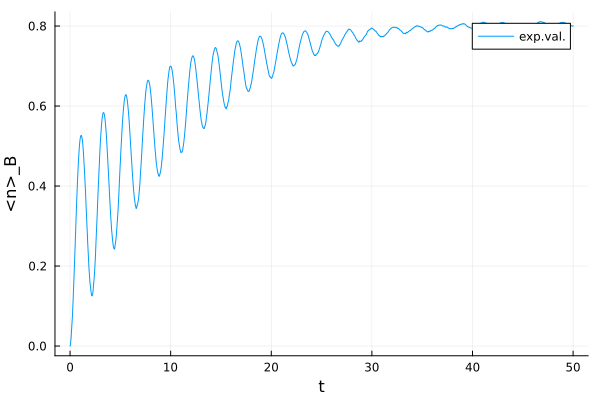

In [10]:
σp_B = kron(ide, [0 0 ; 0 1])
v_ave_up_B = zeros(length(0:dt:t_final))
for n_traj in 1:number_trajectories
    for n_t in eachindex(results[1])
        ψ = results[n_traj][n_t]
        ρ = ψ * ψ'
        v_ave_up_B[n_t] += (tr(ρ * σp_B)).re / number_trajectories
    end
end

plot(0:dt:t_final, v_ave_up_B, xlabel="t", ylabel="<n>_B", label="exp.val.")